In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [280]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)
X,y

(array([[3.32936477, 3.08841406],
        [7.66888955, 0.74068302],
        [3.09874636, 6.00325066],
        ...,
        [4.0008293 , 7.10636889],
        [8.44997459, 1.12856046],
        [7.81588862, 0.88210524]], shape=(1000, 2)),
 array([0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1,
        1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 2, 0,
        2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0,
        1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2,
        0, 2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0,
        2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0,
        1, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 0,
        0, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1,
        2, 0, 2, 2, 0, 1

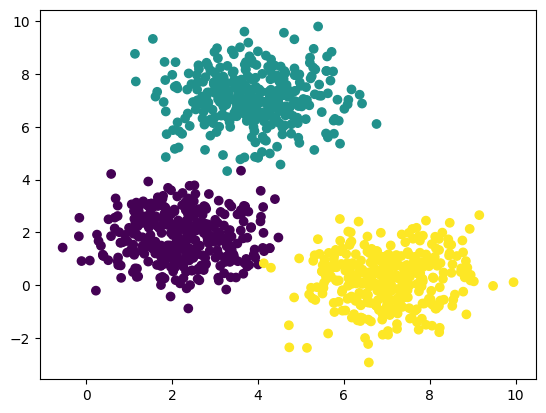

In [281]:
plt.scatter(X[:,0],X[:,1],c=y)

In [282]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=17)

In [283]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [284]:
X_train

array([[ 0.25281046,  0.98470279],
       [-1.09165334, -0.12288212],
       [ 1.30169036, -1.45879115],
       ...,
       [-1.82855719, -0.50694742],
       [-0.98587313, -0.2986271 ],
       [-0.87129494,  1.45928435]], shape=(670, 2))

In [285]:
X_test

array([[-9.31924817e-01, -7.35571676e-02],
       [-1.14680172e+00, -4.25827581e-02],
       [-5.21151845e-01, -1.24405513e-01],
       [ 1.19846913e+00, -6.68231363e-01],
       [-3.45696254e-01, -1.24449878e-01],
       [ 2.86285344e-01,  1.43819535e+00],
       [-9.47914358e-01,  6.67611430e-04],
       [-4.61265230e-01,  9.38252068e-01],
       [ 1.76190372e+00, -1.17259429e+00],
       [-1.16252746e+00, -7.09951892e-01],
       [ 1.34795834e+00, -6.31430360e-01],
       [-1.16530538e+00,  1.24117113e+00],
       [-1.95887716e-01,  1.07473624e+00],
       [ 1.17166434e+00, -1.11997626e+00],
       [ 9.92243101e-01, -9.76735065e-01],
       [-1.06481566e+00, -8.19484440e-01],
       [-1.67325347e+00,  6.90133314e-02],
       [-5.26188088e-01, -4.12194100e-01],
       [-2.38385231e-01,  1.21983835e+00],
       [ 7.79226858e-01, -1.15203569e+00],
       [-1.01843442e+00,  9.94024097e-01],
       [-3.27153413e-01,  1.22082290e+00],
       [ 1.42479078e-01,  1.39997894e+00],
       [-1.

In [286]:
from sklearn.cluster import KMeans

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

wcss

[1340.0000000000005,
 735.112273702675,
 201.7925773389369,
 168.23052349421602,
 136.80313852568062,
 125.5804998681504,
 101.2340595159535,
 95.22140110607542,
 86.03963612738696,
 74.93795131302673]

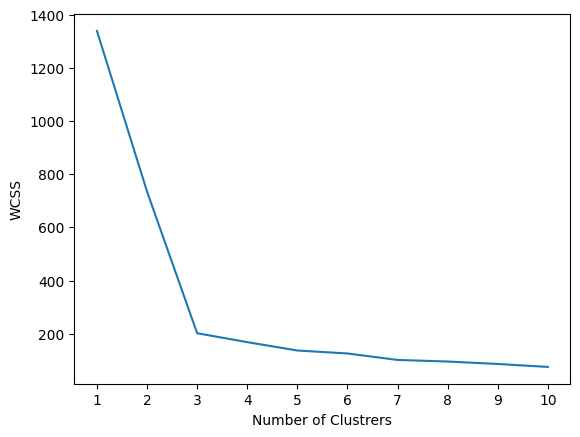

In [287]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [288]:
kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans.fit_predict(X_train)

array([0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0,
       1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0,
       1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1,
       1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2,
       1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1,

In [289]:
y_pred = kmeans.predict(X_test)

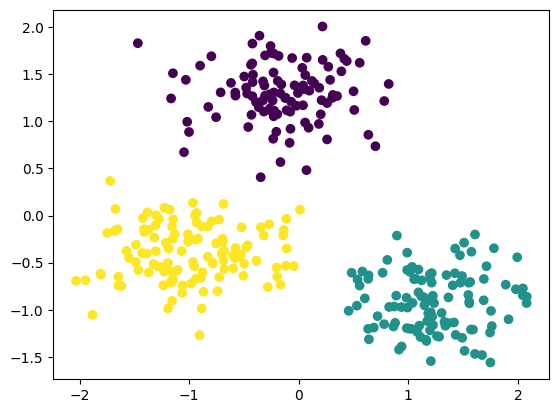

In [290]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [291]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow

np.int64(3)

In [292]:
from sklearn.metrics import silhouette_score
silc=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silc.append(score)
silc

[np.float64(0.5411639234235671),
 np.float64(0.6473087708265712),
 np.float64(0.5291100998796053),
 np.float64(0.45985799286293855),
 np.float64(0.38214826743339664),
 np.float64(0.3786245131003159),
 np.float64(0.3630158898087898),
 np.float64(0.33980496114237646),
 np.float64(0.34261400730144603)]

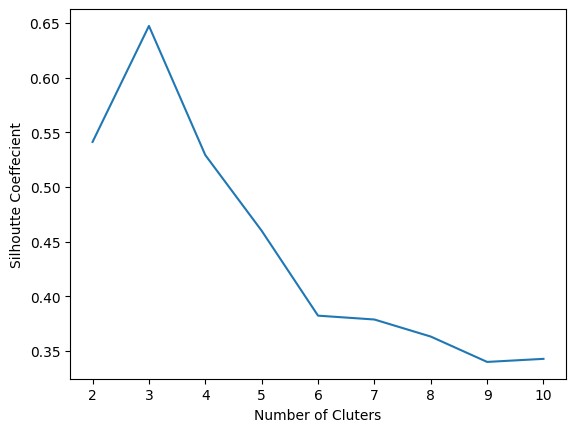

In [293]:
plt.plot(range(2,11),silc)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()